教授上次的意見:
1. 決定好上漲和下跌的定義
2. 將預測的母體改成純上漲或下跌的點位
3. 將範圍擴大，加入次代風暴和經濟大蕭條這種極端案例

本次更改及進度:
1. 決定好上漲和下跌的定義
   (1) 利用10天前和10天後的點位，與當日進行對比。(此種狀況出現的比例最高，約占7成)
       檢視兩個變動比率乘機是否小於0，表示當日為v型或^的圖形中的轉折點，並檢視10天前變動比率和10天後變動比率是否皆大於3%，若真則為反轉點。
       若僅有一邊的變動比率大於3%，檢視另一邊是否為緩漲或緩跌的狀況，若趨勢下變動比率達3%也視為反轉點。
   (2) 縮小天數的window，改成5天及兩天，抓出短期間內震盪超過3%的點位，該點位也視為反轉點。(次高的比率，約占2成左右)
   (3) 尋找緩跌和緩漲的狀況，從剩餘的點位中放大window 的天數，定義為超過20天，尋找緩跌或緩漲並且變動比率超過3%者
2. 本次按照教授意見方式去進行處理和預測，在SVM和KNN的狀況下，預測準確度皆達9成，圖示如下
3. 本次母體從2012年擴增至2006年，涵蓋經濟大蕭條和次代風暴的狀況。
4. 短期的選擇權與股價通常高度相關，VIX的指數為30天後的選擇權價格的變動，若預期上漲則會與股價同向成長，若育期下跌則會與股價反向下跌，因此我
   們希望加入股票反向關係的債券、黃金，以及與股價正相關係的石油進行比較。比較結果皆不如預期，僅有石油的預測準確率達約6成

In [26]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# vix
target_vix = '%5EVIX'
start = dt.datetime(2005, 1, 1)
end = dt.date(2021, 11, 1)
data_vix = web.DataReader(target_vix, 'yahoo', start, end)
data_vix.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-12-31,13.29,12.42,12.42,13.29,0,13.29
2005-01-03,14.23,13.25,13.39,14.08,0,14.08
2005-01-04,14.45,13.93,14.01,13.98,0,13.98
2005-01-05,14.09,13.26,13.98,14.09,0,14.09
2005-01-06,14.09,13.33,14.09,13.58,0,13.58


In [3]:
data_vix['daily_return'] = (data_vix.Close - data_vix.Close.shift(1))/ data_vix.Close.shift(1)
data_vix['high-low'] = (data_vix.High - data_vix.Low)/ data_vix.Close
data_vix['max-min'] = (data_vix.Close - data_vix.Close.min())/ (data_vix.Close.max() - data_vix.Close.min())
data_vix['log_return'] = (np.log(data_vix.Close.values) - np.log(data_vix.Close.shift(1).values))
data_vix.head()

,High,Low,Open,Close,Volume,Adj Close,daily_return,high-low,max-min,log_return
Date,,,,,,,,,,
2004-12-31,13.29,12.42,12.42,13.29,0,13.29,NaN,0.065463,0.056424,NaN
2005-01-03,14.23,13.25,13.39,14.08,0,14.08,0.059443,0.069602,0.067165,0.057743
2005-01-04,14.45,13.93,14.01,13.98,0,13.98,-0.007102,0.037196,0.065806,-0.007128
2005-01-05,14.09,13.26,13.98,14.09,0,14.09,0.007868,0.058907,0.067301,0.007838
2005-01-06,14.09,13.33,14.09,13.58,0,13.58,-0.036196,0.055965,0.060367,-0.036867


In [4]:
data_vix_merge = data_vix.iloc[:, [6, 7, 8, 9]]
data_vix_merge.head()

,daily_return,high-low,max-min,log_return
Date,,,,
2004-12-31,NaN,0.065463,0.056424,NaN
2005-01-03,0.059443,0.069602,0.067165,0.057743
2005-01-04,-0.007102,0.037196,0.065806,-0.007128
2005-01-05,0.007868,0.058907,0.067301,0.007838
2005-01-06,-0.036196,0.055965,0.060367,-0.036867


In [7]:
# stock MACD
data_tw = pd.read_csv('D:\stock_papper\stock_label.csv', index_col = 'Date')
data_tw.index = pd.to_datetime(data_tw.index, format = '%Y/%m/%d')
data_tw.head()

data_tw['5ma'] = data_tw['Adj Close'].ewm(span = 5).mean()
data_tw['10ma'] = data_tw['Adj Close'].ewm(span = 10).mean()
data_tw['15ma'] = data_tw['Adj Close'].ewm(span = 15).mean()
data_tw['20ma'] = data_tw['Adj Close'].ewm(span = 20).mean()
data_tw['25ma'] = data_tw['Adj Close'].ewm(span = 25).mean()
data_tw['daily_return'] = (data_tw['Adj Close'] - data_tw['Adj Close'].shift(1))/ data_tw['Adj Close'].shift(1)
data_tw['log_return'] = np.log(data_tw['Adj Close'].values) - np.log(data_tw['Adj Close'].shift(1).values)
data_tw['5-10ma'] = data_tw['5ma'] - data_tw['10ma']
data_tw['5-15ma'] = data_tw['5ma'] - data_tw['15ma']
data_tw['5-20ma'] = data_tw['5ma'] - data_tw['20ma']
data_tw['5-25ma'] = data_tw['5ma'] - data_tw['25ma']
data_tw.head(10)

data_tw = data_tw.dropna()
data_tw_merge = data_tw.iloc[:, [0, 1, 7, 8, 9, 10, 11, 12]]
data_tw_merge.head()

,Adj Close,label,daily_return,log_return,5-10ma,5-15ma,5-20ma,5-25ma
Date,,,,,,,,
2005-01-04,6060.437500,0,-0.013456,-0.013547,-4.133008,-5.510677,-6.199512,-6.612812
2005-01-05,5988.347656,0,-0.011895,-0.011966,-10.010140,-13.411941,-15.120949,-16.148409
2005-01-06,5982.098145,0,-0.001044,-0.001044,-12.004938,-16.340442,-18.559688,-19.906080
2005-01-07,5935.968262,0,-0.007711,-0.007741,-16.510758,-22.600072,-25.733493,-27.638545
2005-01-10,5942.828125,0,0.001156,0.001155,-16.845460,-23.539864,-27.061996,-29.225846


In [8]:
# 0050 MACD + vix
data_merge = pd.merge(data_tw_merge, data_vix_merge, how = 'inner', left_index = True, right_index = True)
data_merge = data_merge.rename(columns = {'Adj Close' : 'tw_Close', 'daily_return_x' : 'tw_daily_return', 'log_return_x': 'tw_log_return', 'daily_return_y': 'vix_daily_return', 'high-low': 'vix_high_low', 'max-min': 'vix_min_mix', 'log_return_y': 'vix_log_return'})
data_merge = data_merge.reindex(columns = ['tw_Close', 'tw_daily_return', 'tw_log_return', '5-10ma', '5-15ma', '5-20ma', '5-25ma', 'vix_daily_return', 'vix_log_return', 'vix_high_low', 'vix_min_mix', 'label'])
data_merge.head()

,tw_Close,tw_daily_return,tw_log_return,5-10ma,5-15ma,5-20ma,5-25ma,vix_daily_return,vix_log_return,vix_high_low,vix_min_mix,label
Date,,,,,,,,,,,,
2005-01-04,6060.437500,-0.013456,-0.013547,-4.133008,-5.510677,-6.199512,-6.612812,-0.007102,-0.007128,0.037196,0.065806,0
2005-01-05,5988.347656,-0.011895,-0.011966,-10.010140,-13.411941,-15.120949,-16.148409,0.007868,0.007838,0.058907,0.067301,0
2005-01-06,5982.098145,-0.001044,-0.001044,-12.004938,-16.340442,-18.559688,-19.906080,-0.036196,-0.036867,0.055965,0.060367,0
2005-01-07,5935.968262,-0.007711,-0.007741,-16.510758,-22.600072,-25.733493,-27.638545,-0.006627,-0.006649,0.042254,0.059143,0
2005-01-10,5942.828125,0.001156,0.001155,-16.845460,-23.539864,-27.061996,-29.225846,-0.019274,-0.019462,0.074830,0.055608,0


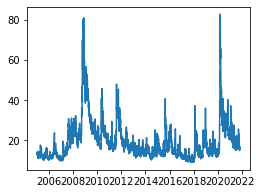

In [9]:
# Vix Close
plt.figure(figsize = (4, 3))
plt.plot(data_vix.Close)

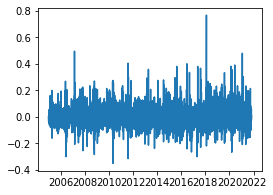

In [10]:
# Vix log 
plt.figure(figsize = (4, 3))
plt.plot(data_merge.vix_log_return)

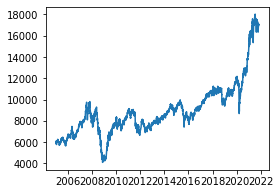

In [11]:
# TW close
plt.figure(figsize = (4, 3))
plt.plot(data_merge.tw_Close)

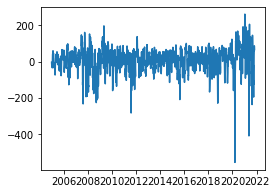

In [12]:
# TW 5-10ma
plt.figure(figsize = (4, 3))
plt.plot(data_merge['5-10ma'])

In [13]:
(data_merge['label'] == 0).value_counts()

True     3789
False     208
Name: label, dtype: int64

In [14]:
mask = (data_merge['label'] != 0)
data_train = data_merge[mask]
data_train.head()

,tw_Close,tw_daily_return,tw_log_return,5-10ma,5-15ma,5-20ma,5-25ma,vix_daily_return,vix_log_return,vix_high_low,vix_min_mix,label
Date,,,,,,,,,,,,
2005-01-24,5771.458984,-0.013238,-0.013327,-31.133285,-46.252287,-54.975989,-60.581356,0.020195,0.019994,0.039590,0.074915,1
2005-03-01,6259.666016,0.008354,0.008319,46.017951,80.490329,104.665951,121.345098,-0.003311,-0.003317,0.036545,0.039429,-1
2005-04-20,5692.988770,-0.009627,-0.009674,-73.953690,-116.745128,-145.746048,-166.212857,0.131016,0.123116,0.161347,0.105778,1
2005-07-08,6201.376465,-0.001803,-0.001804,-17.259358,-16.456729,-4.834605,11.139135,-0.083267,-0.086939,0.104803,0.031407,1
2005-08-04,6445.985352,-0.001481,-0.001482,18.587778,30.732214,44.196282,59.329184,0.058326,0.056689,0.046326,0.045955,-1


In [15]:
data_train.corr(method='pearson')

,tw_Close,tw_daily_return,tw_log_return,5-10ma,5-15ma,5-20ma,5-25ma,vix_daily_return,vix_log_return,vix_high_low,vix_min_mix,label
tw_Close,1.000000,0.114968,0.116805,0.065539,0.101100,0.137744,0.172497,-0.097319,-0.090585,0.003304,-0.329263,-0.114244
tw_daily_return,0.114968,1.000000,0.999862,0.439734,0.399189,0.375325,0.358221,0.027562,0.044748,-0.341724,-0.224240,-0.660152
tw_log_return,0.116805,0.999862,1.000000,0.446775,0.406428,0.382630,0.365550,0.026652,0.043907,-0.345001,-0.232008,-0.659904
5-10ma,0.065539,0.439734,0.446775,1.000000,0.988309,0.965219,0.938587,0.180929,0.210716,-0.471461,-0.414879,-0.596541
5-15ma,0.101100,0.399189,0.406428,0.988309,1.000000,0.993450,0.978823,0.160667,0.189953,-0.458189,-0.438289,-0.538844
5-20ma,0.137744,0.375325,0.382630,0.965219,0.993450,1.000000,0.995691,0.143611,0.172423,-0.447049,-0.456117,-0.496699
5-25ma,0.172497,0.358221,0.365550,0.938587,0.978823,0.995691,1.000000,0.129473,0.157830,-0.437218,-0.471116,-0.463031
vix_daily_return,-0.097319,0.027562,0.026652,0.180929,0.160667,0.143611,0.129473,1.000000,0.993155,0.145016,0.130103,-0.294705
vix_log_return,-0.090585,0.044748,0.043907,0.210716,0.189953,0.172423,0.157830,0.993155,1.000000,0.068912,0.114758,-0.316791
vix_high_low,0.003304,-0.341724,-0.345001,-0.471461,-0.458189,-0.447049,-0.437218,0.145016,0.068912,1.000000,0.377842,0.299057


In [16]:
(data_merge['label'] == 1).value_counts()

False    3889
True      108
Name: label, dtype: int64

In [17]:
(data_merge['label'] == -1).value_counts()

False    3897
True      100
Name: label, dtype: int64

In [18]:
x, y = data_train.iloc[:, :11].values, data_train.iloc[:, 11].values
print(f'x : {x.shape} \ny : {y.shape}')

x : (208, 11) 
y : (208,)


In [19]:
# Feature selection find better MACD
# cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm

clf = svm.SVC()

x_selection = x[:, 8]
for i in range(3, 7):
    x_selection_copy = np.concatenate([x_selection.reshape(-1, 1), x[:, i].reshape(-1, 1)], axis = 1)
    scores = cross_val_score(clf, x_selection_copy, y, cv = 5).mean()
    print(f'{i} : {scores}')

3 : 0.9138211382113821
4 : 0.8708478513356562
5 : 0.8034843205574912
6 : 0.7795586527293844


In [20]:
# evaluation
for i in range(3, 8):
    clf.fit(x[:, [i, 8]], y)
    y_predict = clf.predict(x[:, [i, 8]])
    print(f'{i} : {accuracy_score(y, y_predict)}\n')

3 : 0.9182692307692307

4 : 0.8701923076923077

5 : 0.8076923076923077

6 : 0.7884615384615384

7 : 0.7355769230769231



In [21]:
# Using Diff Models
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
tree_clf = tree.DecisionTreeClassifier()
clf_random = RandomForestClassifier(n_estimators=200)
xgbc = XGBClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors= 15)

model = [sgd_clf, tree_clf, clf_random, gnb, knn]
model_list = ['sgd_clf', 'tree_clf', 'clf_random', 'gnb','knn']
for i in range(0, 5):
    x_selection_copy = np.concatenate([x_selection.reshape(-1, 1), x[:, 3].reshape(-1, 1)], axis = 1)
    scores = cross_val_score(model[i], x_selection_copy, y, cv = 5).mean()
    print(f'{model[]} : {scores}')

c:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0 : 0.9040650406504065
1 : 0.8368176538908246
2 : 0.8850174216027875
3 : 0.8420441347270616
4 : 0.9138211382113821


In [32]:
x_test_data = data_merge.iloc[-200:, [3, 8]].values
y_test_data = data_merge.iloc[-200:, 11].values

In [34]:
len(x_test_data)

200

In [37]:
y_predict_all = clf.predict(x_test_data)
accuracy_score(y_test_data, y_predict_all)

0.06

In [ ]:
y_test_data

In [22]:
clf.fit(x[:, [3, 8]], y)
y_predict = clf.predict(x[:, [3, 8]])
print(f'{i} : {accuracy_score(y, y_predict)}\n')

4 : 0.9182692307692307



In [23]:
y = y.astype(str)
y[y=='1'] = 'b'
y[y=='-1'] = 'r'
y_predict = y_predict.astype(str)
y_predict[y_predict=='1'] = 'c'
y_predict[y_predict=='-1'] = 'g'
# print(y)
# print(y_predict)

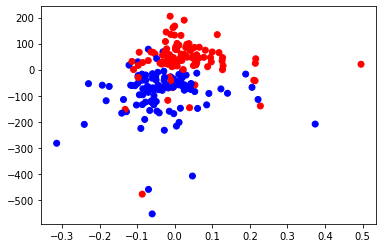

In [24]:
plt.scatter(x_selection, x[:, 3],c=y, marker='o')
plt.show()

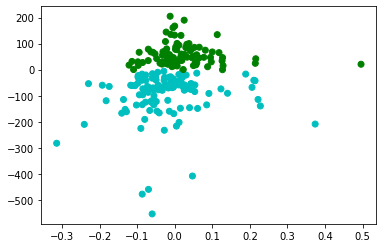

In [25]:
plt.scatter(x_selection, x[:, 3],c=y_predict, marker='o')
plt.show()